In [19]:
import sys
import os
import importlib

import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

import dart.Util
import dart.metrics.start_calculations

In [20]:
config = {
    'test_size': 1000, 
    'metrics':  ['calibration', 'fragmentation', 'activation', 'representation', 'alternative_voices'],
    'cutoff': [1, 2, 5, 10, 20, 0],
    'algorithms': ['lstur', 'pop', 'random'],
    'output_folder': 'output/',
    'language': 'english'
}

In [21]:
articles, recommendations, behavior_file = dart.Util.read_files()

In [22]:
calculator = dart.metrics.start_calculations.MetricsCalculator(config, articles, recommendations, behavior_file)

2022-11-21 11:54:48.459366	starting calculations
0/1000
100/1000
200/1000
300/1000
400/1000
500/1000
600/1000
700/1000
800/1000
900/1000
18000 successfully calculated
0 failed
2022-11-21 12:00:08.173062	done


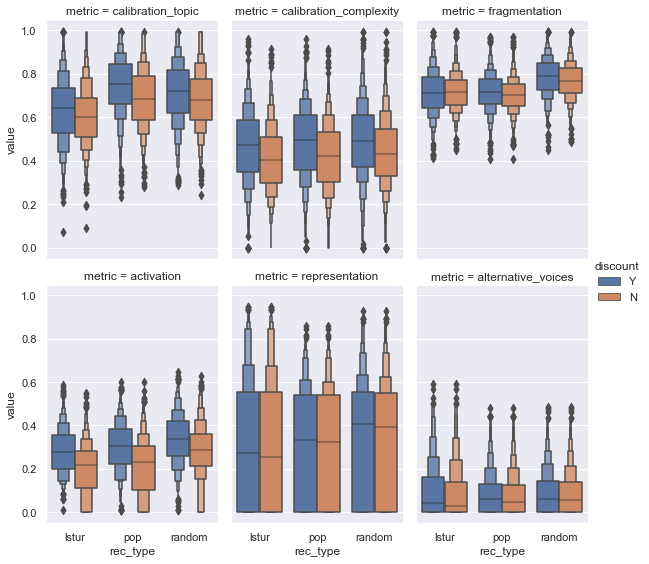

In [23]:
df = calculator.execute()

In [24]:
articles.enriched_entities

N55528    [{'text': 'First', 'alternative': ['First'], '...
N18955    [{'text': 'CINCINNATI', 'alternative': ['CINCI...
N61837    [{'text': 'American', 'alternative': ['America...
N53526    [{'text': 'first', 'alternative': ['first'], '...
N38324    [{'text': 'FAAD', 'alternative': ['FAAD'], 'fr...
                                ...                        
N63550                                                 None
N30345                                                 None
N30135                                                 None
N44276                                                 None
N39563                                                 None
Name: enriched_entities, Length: 42386, dtype: object

In [25]:
recommendations.loc[59013]

userid                                               U45907
date                                    2019-11-15 09:29:30
lstur     [N58264, N16120, N30290, N42844, N5472, N39393...
naml      [N58264, N30290, N39393, N5472, N9284, N42844,...
npa       [N39393, N30290, N58264, N13270, N9284, N496, ...
nrms      [N58264, N16120, N30290, N9284, N5472, N759, N...
pop       [N58264, N11930, N58098, N23336, N496, N55237,...
random    [N19990, N759, N759, N11930, N5472, N52514, N5...
Name: 59013, dtype: object

In [26]:
recommendations

,userid,date,lstur,naml,npa,nrms,pop,random
1,U80234,2019-11-15 12:37:50,"[N19990, N42844, N5940, N6916, N53572, N11930,...","[N5940, N42844, N19990, N34130, N31958, N5472,...","[N19990, N28682, N5940, N34130, N42844, N48740...","[N5940, N19990, N24802, N42844, N62365, N48740...","[N11930, N29862, N58098, N55237, N53572, N5077...","[N48740, N29862, N50775, N50775, N34130, N6400..."
2,U60458,2019-11-15 07:11:50,"[N23513, N31958, N32536, N46976, N35216, N2003...","[N23513, N32536, N20036, N31958, N46976, N3677...","[N23513, N32536, N35216, N46976, N36779, N3195...","[N23513, N20036, N35216, N32536, N31958, N3677...","[N32536, N31958, N46976, N20036, N35216, N2351...","[N32536, N31958, N31958, N20036, N20036, N3521..."
3,U44190,2019-11-15 09:55:12,"[N30290, N6916, N31958, N42844, N5472, N11930,...","[N30290, N31958, N6916, N5472, N42844, N47383,...","[N30290, N6916, N31958, N5472, N20036, N42844,...","[N5472, N30290, N6916, N31958, N42844, N62365,...","[N37352, N11930, N58098, N16680, N55237, N5357...","[N55036, N20036, N53283, N42844, N58251, N5357..."
4,U87380,2019-11-15 15:12:46,"[N15347, N1952, N52492, N60762, N19611, N19990...","[N1952, N52492, N15347, N24802, N51470, N45057...","[N1952, N6400, N15347, N60762, N29091, N19990,...","[N24802, N52492, N1952, N6400, N51470, N19990,...","[N6074, N11930, N29862, N45057, N53572, N38620...","[N38620, N29862, N49285, N19990, N38620, N6236..."
5,U9444,2019-11-15 08:25:46,"[N30290, N23513, N31958, N19990, N49285, N5940...","[N30290, N23513, N31958, N34130, N51470, N4928...","[N23513, N30290, N31958, N34130, N19990, N4928...","[N23513, N30290, N31958, N49285, N62365, N3413...","[N31958, N20036, N5940, N51470, N49285, N62365...","[N29393, N23513, N62365, N23355, N36779, N3677..."
...,...,...,...,...,...,...,...,...
73148,U77536,2019-11-15 20:40:16,"[N9284, N58264, N30290, N23446, N59933, N61811...","[N30290, N1952, N9284, N23446, N35815, N58264,...","[N9284, N23446, N30290, N1952, N35815, N938, N...","[N37261, N1952, N9284, N30290, N58264, N18708,...","[N58264, N16344, N38311, N962, N60858, N60186,...","[N65145, N26515, N26595, N12843, N44496, N2297..."
73149,U56193,2019-11-15 13:11:26,"[N42844, N5940, N19990, N49285, N62365, N34130...","[N42844, N5940, N34130, N49285, N53572, N31958...","[N42844, N5940, N34130, N49285, N19990, N53572...","[N42844, N5940, N24802, N49285, N62365, N5472,...","[N29862, N55237, N53572, N31958, N42844, N1139...","[N53572, N19990, N48740, N5472, N5940, N62365,..."
73150,U16799,2019-11-15 15:37:06,"[N16120, N12409, N496, N38311, N6916, N54593, ...","[N5949, N12409, N5051, N16120, N54593, N53572,...","[N54593, N5949, N16120, N5051, N496, N60762, N...","[N16120, N5051, N60215, N12409, N24802, N54593...","[N16344, N38311, N962, N6074, N11930, N29862, ...","[N55036, N45057, N26780, N16396, N56434, N1961..."
73151,U8786,2019-11-15 08:29:26,"[N5940, N20036, N58098, N19990, N6916, N42844,...","[N5940, N30290, N20187, N42844, N58098, N20036...","[N5940, N30290, N6916, N58098, N23513, N19990,...","[N5940, N20036, N58098, N30290, N6916, N19990,...","[N58098, N5940, N23513, N53283, N23355, N36779...","[N6916, N46976, N23692, N20036, N5940, N58098,..."


RADio attempts to capture five normative concepts in news reccomendations. These are:
- Calibration (topics): Article subcategories as provided in the MIND dataset
- Calibration (complexity): article complexity as calculated with the Flesh-Kincaid reading ease tes
- Fragmentation: Recommended news story chains, which are identified following the procedure in (ADD!!!)
- Activation: affect scores, which is approximated by the absolute value of a sentinetnt analysis score
- Representation: The presence of political actors
- Alternative voices: the presence of minority voices versus majordity voices. We identifty someone asa minority voice when they are identified as a person through the NLP pipeline, but cannot be linked toa wikipedia page

In [27]:
df.head()

,impr_index,rec_type,cutoff,distance,discount,metric,value
0,25921,lstur,1,kl,Y,calibration_topic,1.263884
1,25921,lstur,1,jsd,Y,calibration_topic,0.276809
2,25921,lstur,1,kl,N,calibration_topic,2.769485
3,25921,lstur,1,jsd,N,calibration_topic,0.421295
4,25921,lstur,1,kl,Y,calibration_complexity,2.426522


Values in the framework, are measured on two scales. For the purpose of this workshop, only the Jensen Shannon divergence is used, since this is a normalized value and allows for more intuitive comparison

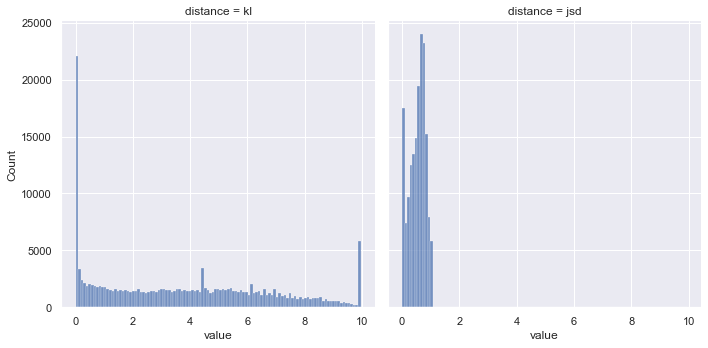

In [28]:
sns.displot(data=df, x="value", col="distance", kde=False)

In [29]:
df = df[df['distance'] == 'jsd']
df.head()

,impr_index,rec_type,cutoff,distance,discount,metric,value
1,25921,lstur,1,jsd,Y,calibration_topic,0.276809
3,25921,lstur,1,jsd,N,calibration_topic,0.421295
5,25921,lstur,1,jsd,Y,calibration_complexity,0.391820
7,25921,lstur,1,jsd,N,calibration_complexity,0.611108
9,25921,lstur,1,jsd,Y,fragmentation,0.914380


All values theoretically range from 0-1 now.

In [30]:
for metric in df['metric'].unique():
    
    min = df[df['metric'] == metric]["value"].min()
    max = df[df['metric'] == metric]["value"].max()
    print(f'{metric.upper()}: ranges from {min} to {max}')

CALIBRATION_TOPIC: ranges from 0.0 to 0.9942797605616538
CALIBRATION_COMPLEXITY: ranges from 0.0 to 0.9942797605616536
FRAGMENTATION: ranges from 0.4072525737842415 to 0.9942797605616536
ACTIVATION: ranges from 0.0 to 0.9819446000459985
REPRESENTATION: ranges from 0.0 to 0.9475245535670622
ALTERNATIVE_VOICES: ranges from 0.0 to 0.5922858674982412


Multiple algorithms are used in the framework to estimate these values. These algorithms are
- LSTUR
- NAML
- NPA
- NRMS
- Most popular
- Random

The differences in the values can be retrieved by the following:

CALIBRATION_TOPIC
lstur: 0.6690540070676965
pop: 0.779332372399407
random: 0.7450867936385851
CALIBRATION_COMPLEXITY
lstur: 0.5243612164223004
pop: 0.5418204419660326
random: 0.5423171255010407
FRAGMENTATION
lstur: 0.7434010194655137
pop: 0.748334162255977
random: 0.8060628067021299
ACTIVATION
lstur: 0.37100427603194036
pop: 0.3887493335077022
random: 0.4179327106652994
REPRESENTATION
lstur: 0.3047366423310622
pop: 0.29198014199334776
random: 0.35157788227455783
ALTERNATIVE_VOICES
lstur: 0.10420483182780312
pop: 0.08238400204491766
random: 0.09635706036147425


,calibration_topic,calibration_complexity,fragmentation,activation,representation,alternative_voices
Algorithms,,,,,,
lstur,0.677207,0.543245,0.741865,0.397773,0.310824,0.107642
pop,0.797435,0.561872,0.750859,0.417634,0.295912,0.084973
random,0.756075,0.559004,0.813374,0.436222,0.354721,0.098863


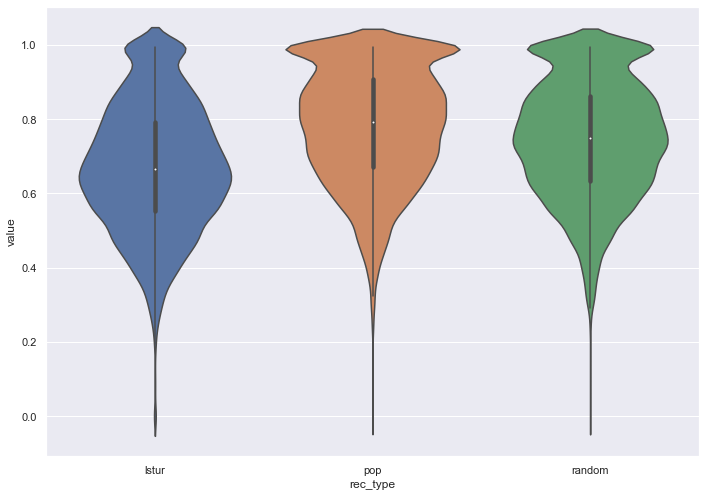

In [31]:
for metric in df['metric'].unique():
    print(metric.upper())
    for rec in df['rec_type'].unique():
        mean = df[df['metric'] == metric][df["rec_type"] == rec]["value"].mean()
        print(f'{rec}: {mean}')
# Notice that, due to the normalized values, the differences in algorithms can also easily be interpreted!
sns.violinplot(data=df[df["metric"] == "calibration_topic"], x="rec_type", y="value")

tabledata = df[df['discount'] == "Y"]
table = pd.DataFrame(columns=['Algorithms'])
table = table.set_index('Algorithms')
for metric in tabledata['metric'].unique():
    for rec in tabledata['rec_type'].unique():
        mean = tabledata[tabledata['metric'] == metric][tabledata["rec_type"] == rec]["value"].mean()
        table.at[rec, metric] = mean
table


Finally, the framework differentate between reccomender systems that takes ranking into account. That is: something displayed at the top, is seen as more valuable. And also how many are displayed to the user known as the cutoff.

In [32]:
print("Means of 'calibration_topic' for rank awareness")
for discount in df['discount'].unique():
    mean = df[df['metric'] == 'calibration_topic'][df['discount'] == discount]["value"].mean()
    print(f'{discount}: {mean}')

print("Means of 'calibration_topic' for different cutoff points")
for cutoff in df['cutoff'].unique():
    mean = df[df['metric'] == 'calibration_topic'][df['cutoff'] == cutoff]["value"].mean()
    print(f'{cutoff}: {mean}')


Means of 'calibration_topic' for rank awareness
Y: 0.7435725036649207
N: 0.7187429450722125
Means of 'calibration_topic' for different cutoff points
1: 0.8450171187671448
2: 0.7938887705721946
5: 0.7157610367343862
10: 0.6774264733792112
20: 0.6774264733792112
0: 0.6774264733792112


Algorithms generate different resulting values per cutoff point as shown below

Text(0.5, 1.0, 'Value of calibration_topic and representation per algorithm at specific cutoff points')

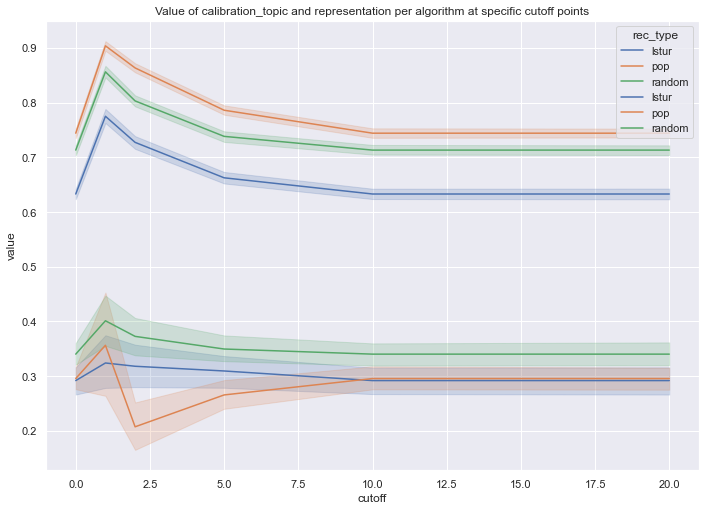

In [33]:
sns.lineplot(
    data=df[df['metric'] == 'calibration_topic'][df['discount'] == 'Y'],
    x="cutoff", y="value", hue="rec_type",
    markers=True, dashes=False
)
sns.lineplot(
    data=df[df['metric'] == 'representation'][df['discount'] == 'N'],
    x="cutoff", y="value", hue="rec_type",
    markers=True, dashes=False
).set_title('Value of calibration_topic and representation per algorithm at specific cutoff points')

<AxesSubplot:xlabel='rec_type', ylabel='value'>

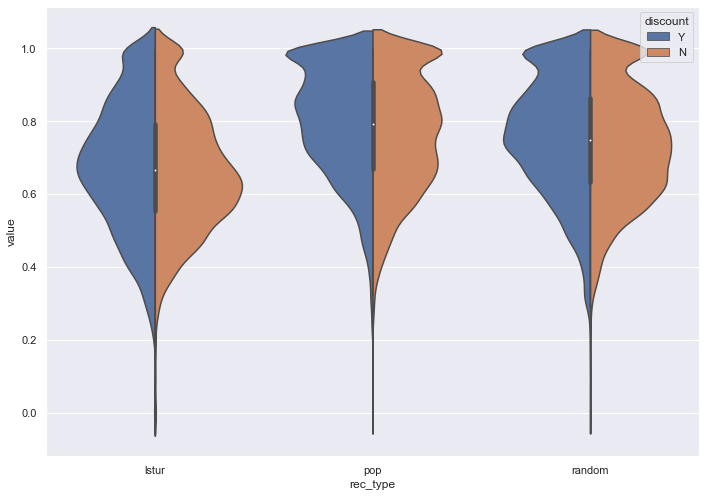

In [34]:
#RANDOM
sns.violinplot(data=df[df["metric"] == "calibration_topic"], x="rec_type", y="value", hue = 'discount', split=True)